In [254]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft
import scipy as sp
from scipy.optimize import curve_fit
import lmfit
from lmfit import Model
import pandas as pd
from scipy.signal import find_peaks

In [255]:
filename_prefix = "/Users/olivershen/Library/CloudStorage/GoogleDrive-shenzongqi2000@gmail.com/.shortcut-targets-by-id/1kZAJHBlurAxVO65haJzlqoIV3f2UO_JV/20250409_Gedik_1st_011/Data/"
time_file =filename_prefix+"ue_20250409_88_merge.csv"

In [256]:
def read_file(df):
    timelist = df[df.columns[0]].to_numpy()
    time = timelist.tolist()
    
    onlist = df[df.columns[1]].to_numpy()
    on = onlist.tolist()
    
    offlist = df[df.columns[2]].to_numpy()
    off = offlist.tolist()
    result = []
    end_index = len(on)
    
    for i in range(end_index):
        result.append(on[i]/off[i])
    X= np.array(time[20:])
    Y = np.array(result[20:])-1
    # Polynomial fit (e.g., 3rd order)
    #p = np.polyfit(X, Y, 3)
   # background = np.polyval(p, X)

    
    # Fit a constrained polynomial (e.g., degree 3 without constant term)
    degree = 3
    X_excludex0 = np.vstack([X**d for d in range(1, degree+1)]).T  # Exclude x^0
    
    # Solve least squares: minimize ||X @ coeffs - y||
    coeffs, *_ = np.linalg.lstsq(X_excludex0, Y, rcond=None)
    
    # Reconstruct background
    background = X_excludex0 @ coeffs

    
    # Subtract background
    oscillation = Y - background
    
    return oscillation,background

Text(0, 0.5, 'Intensity')

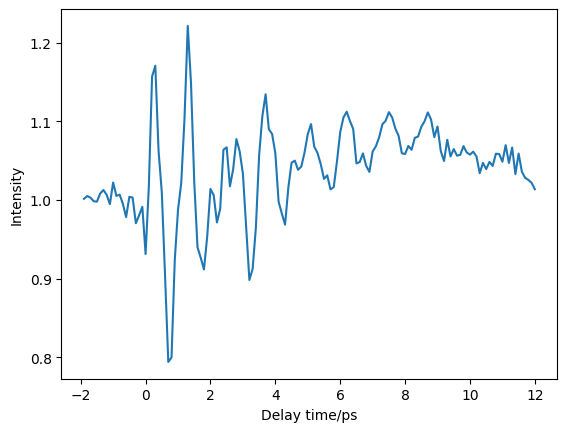

In [257]:
plt.plot(time,result)
plt.xlabel('Delay time/ps')
plt.ylabel('Intensity')

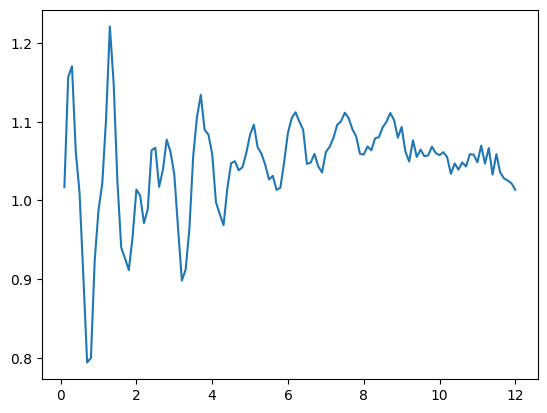

In [258]:
plt.plot(time[20:],result[20:])

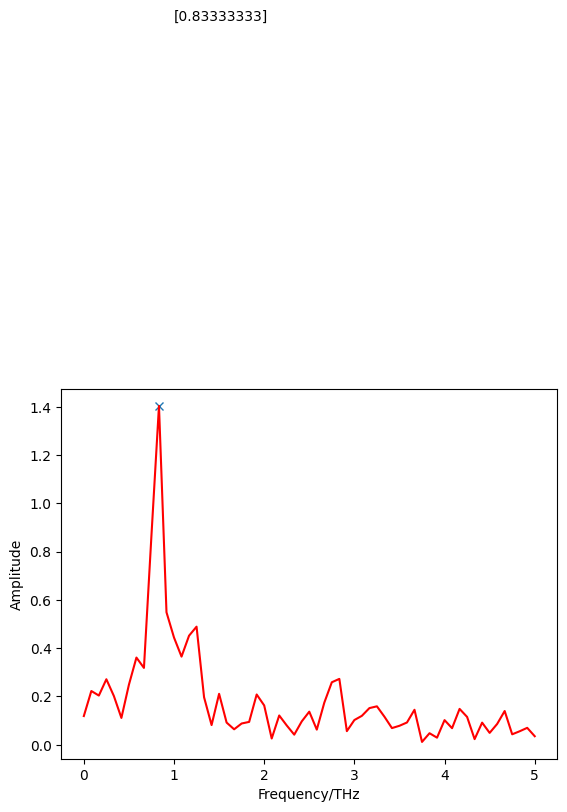

In [259]:
fdata = np.fft.rfftfreq(len(X), d=0.1)
yhatdata = abs(np.fft.rfft(oscillation))
peaks, properties = find_peaks(yhatdata, height=0.5) 
plt.plot(fdata[peaks], yhatdata[peaks], "x")
plt.plot(fdata, yhatdata, 'r')
plt.xlabel('Frequency/THz')
plt.ylabel('Amplitude')
#plt.xlim(0.5,5)
#plt.ylim(0,4)
plt.text(1,3,str(fdata[peaks]))
plt.show()


## padding

In [215]:
N = len(Y)
N_padded = 256  # Or: N_padded = 2**int(np.ceil(np.log2(N)))

# FFT with zero padding
y_padded = np.pad(oscillation, (0, N_padded - N), 'constant')

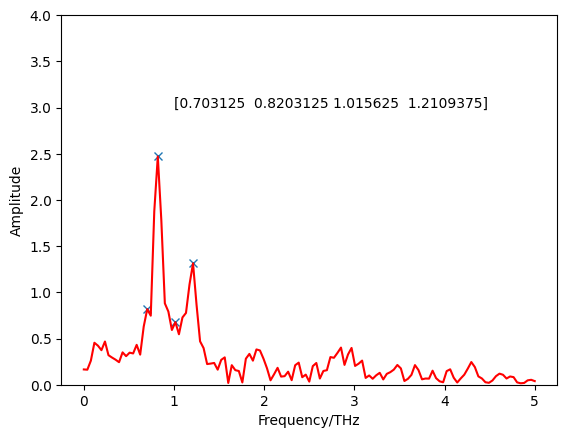

In [216]:
fdata = np.fft.rfftfreq(N_padded, d=0.1)
yhatdata = abs(np.fft.rfft(y_padded))
peaks, properties = find_peaks(yhatdata, height=0.5) 
plt.plot(fdata[peaks], yhatdata[peaks], "x")
plt.plot(fdata, yhatdata, 'r')
plt.xlabel('Frequency/THz')
plt.ylabel('Amplitude')
#plt.xlim(0.5,5)
plt.ylim(0,4)
plt.text(1,3,str(fdata[peaks]))
plt.show()

## fluence dependence

In [246]:
file_list=[ filename_prefix+"ue_20250409_108_merge.csv",
    filename_prefix+"ue_20250409_93_merge.csv",
    filename_prefix+"ue_20250409_88_merge.csv",
          filename_prefix+"ue_20250409_98_merge.csv",
          filename_prefix+"ue_20250409_103_merge.csv"]

In [264]:
file_list=[ filename_prefix+"ue_20250409_261_merge.csv"
   ]

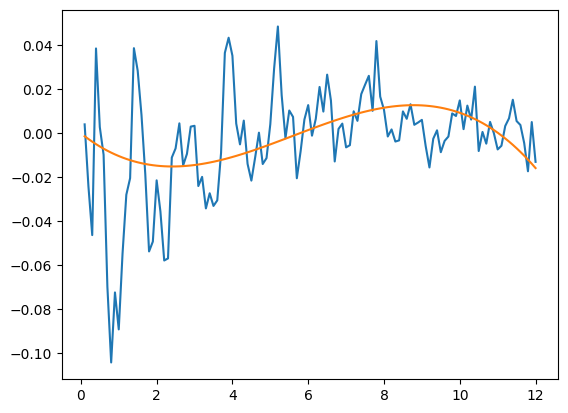

In [265]:
for time_file in file_list:
    df = pd.read_csv(time_file)
    oscillation,background = read_file(df)
    plt.plot(X,oscillation+background)
    plt.plot(X,background)
    #plt.plot(X,oscillation)

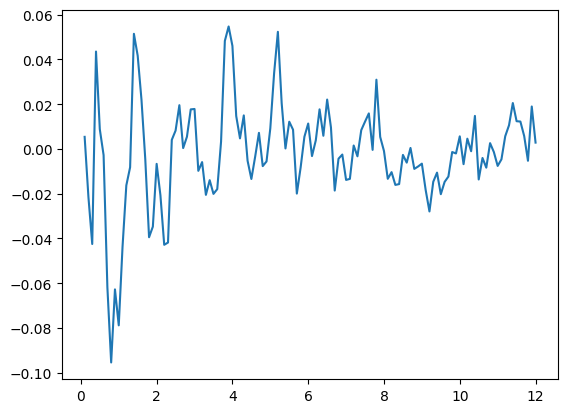

In [266]:
for time_file in file_list:
    df = pd.read_csv(time_file)
    oscillation,background = read_file(df)
    plt.plot(X,oscillation)

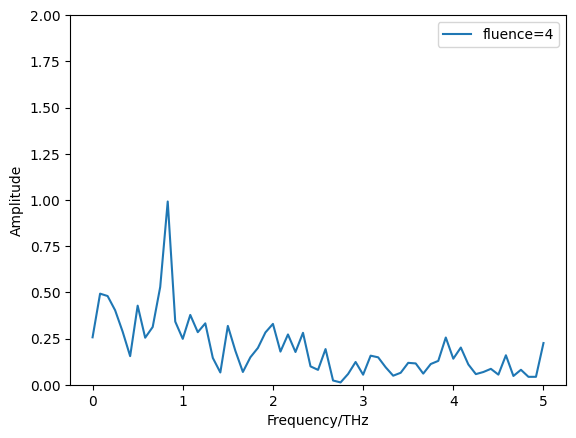

In [268]:
amp1=[]
amp2=[]
amp3=[]
amp4=[]
a=0
fluence = [4,3,2,1,0.5]
for time_file in file_list:
    df = pd.read_csv(time_file)
    oscillation,background = read_file(df)
    N = len(Y)
    N_padded = 120  # Or: N_padded = 2**int(np.ceil(np.log2(N)))

    # FFT with zero padding
    y_padded = np.pad(oscillation, (0, N_padded - N), 'constant')
    
    fdata = np.fft.rfftfreq(N_padded, d=0.1)
    yhatdata = abs(np.fft.rfft(y_padded))
    #peaks, properties = find_peaks(yhatdata, height=0.5) 
    #plt.plot(fdata[peaks], yhatdata[peaks], "x")
    plt.plot(fdata, yhatdata,label='fluence='+str(fluence[a]))
    plt.xlabel('Frequency/THz')
    plt.ylabel('Amplitude')
    #plt.xlim(0.5,5)
    plt.ylim(0,2)
    plt.legend()
    a = a + 1
    amp1.append(yhatdata[np.argwhere(abs(fdata-0.833)<0.001)[0]][0])
    amp2.append(yhatdata[np.argwhere(abs(fdata-1.166)<0.001)[0]][0])
    amp3.append(yhatdata[np.argwhere(abs(fdata-1.916)<0.001)[0]][0])
    amp4.append(yhatdata[np.argwhere(abs(fdata-2.666)<0.001)[0]][0])
#plt.text(1,3,str(fdata[peaks]))
plt.show()

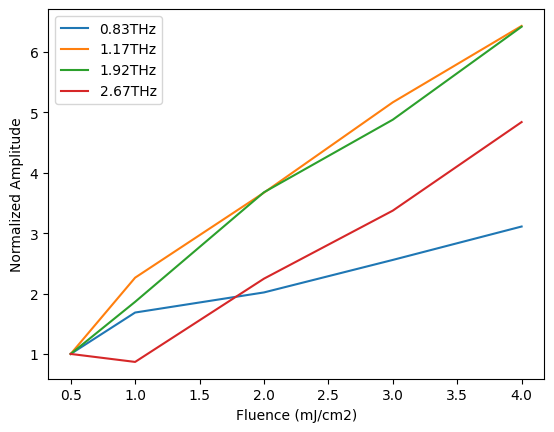

In [253]:
plt.plot(fluence,amp1/amp1[-1],label='0.83THz')
plt.plot(fluence,amp2/amp2[-1],label='1.17THz')
plt.plot(fluence,amp3/amp3[-1],label='1.92THz')
plt.plot(fluence,amp4/amp4[-1],label='2.67THz')
plt.xlabel('Fluence (mJ/cm2)')
plt.ylabel('Normalized Amplitude')
plt.legend()